This notebook will be used to demonstrate how Fig. 4 and 5a have been generated

First, for Fig. 4a we create a fixed ESL event and define general parameters of the model

In [1]:
import numpy as np
from model_functions import *

# define the parameters
SLR=np.array([0.0,0.33,0.66,1.0,1.5]) #m considered sea level rise in the simulations
colors=['grey','orange','red','blue','purple'] #colors for the plots
A=1e08    #m area of the lagoon
H=2.0     #m depth of the inlet
W=1000.0  #m width of the inlet
z_0=0.001 #m roughness length
dt = 5.0  #s time step of the model
T_max=2*24*3600 #s length of the simulation

#create the time axis in dt step size
t = np.arange(0.0,T_max+dt,dt)

#prescribe a surge, here Gaussian
def Gauss(t,amp,width):
    eta = amp*np.exp(-np.power((t - t[-1]/2.0)/width, 2.)/2)
    return(eta)

eta_0=Gauss(t,1.5,5.0*3600.0)

#do the simulation by using the function model from model_functions, see also model_functions.py
slope, intercep, _,eta_result,_,_ = model(A,H,W,z_0,dt,T_max,eta_0,SLR=SLR,Regression=True)

The output of the model we need is the slope $\alpha$, the interception which is zero and eta_result which has the dimensions (t, SLR)

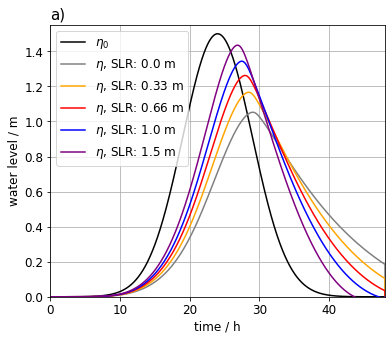

In [2]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 12})
fig,ax=plt.subplots(1,1,figsize=(6,5))

ax.set_title('a)',loc='left',fontsize=15.0)
ax.grid('on')
ax.plot(t/3600.0,eta_0,color='k',label='$\eta_0$')
for i in np.arange(eta_result.shape[1]):
    ax.plot(t/3600.0,eta_result[:-1,i],color=colors[i],label = '$\eta$, SLR: '+str(SLR[i])+' m')
ax.set_xlim(0.0,T_max/3600.0)
ax.set_xlabel('time / h')
ax.set_ylabel('water level / m')
ax.set_ylim(0.0,1.55)
ax.legend(loc='upper left')
plt.show()

Let's plot the linear interpolation of the total water level increase with SLR

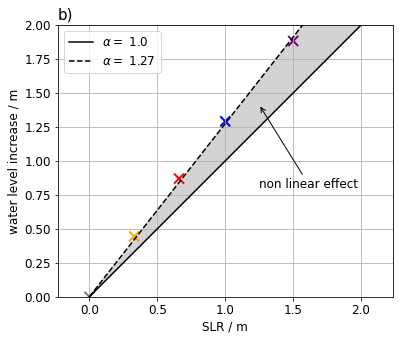

In [3]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots(1,1,figsize=(6,5))

ax.set_title('b)',loc='left',fontsize=15.0)
ax.grid('on')
ax.axis('equal')
ax.fill_between(np.array([0,3]),np.array([0,3]),slope*np.array([0,3])+intercep,color='lightgrey')
ax.plot([0,3],[0,3],color='k',label='$\\alpha =$ 1.0')
ax.plot(np.array([0,3]),slope*np.array([0,3])+intercep,ls='dashed',color='k',label='$\\alpha =$ '+str('%.2f' % slope))

ax.scatter(SLR,np.max(eta_result,axis=0)-np.max(eta_result[:,0])+SLR,c=colors,marker='x',s=100.0,lw=2.0)
ax.set_xlim(0.0,2.0)
ax.set_xlabel('SLR / m')
ax.set_ylabel('water level increase / m')
ax.set_ylim(0.0,2.0)
ax.legend(loc='upper left')
ax.annotate('non linear effect',(1.25,1.13*1.25),xytext=(1.25,0.8),arrowprops = dict(facecolor ='k',
                               arrowstyle='->'))
plt.show()

Now we will change the width to area ratio ($A$ will be kept constant, $W$ will be changed), as well as the roughness length $z_0$, for a fixed depth $H=2.0$ m. We further will plot the difference of the ESLs inside the lagoon, compared to the prescribed ESL. Since a number of simulation have to be computed, this might take some minutes.

In [5]:
SLR=np.array([0.0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.5]) #m considered SLR in the simulations
A=1e09
H=2.0
W_ar = np.array([50.0,75.0,100.0,150.0,200.0,300.0,400.0,500.0,750.0,1000.0,1250.0,1500.0,1750.0,2000.0,
              2500.0,3000.0,4000.0,5000.0,6000.0,7000.0,8000.0,10000.0,15000.0,20000.0,100000.0,1000000.0])
z_0_ar=np.array([0.001,0.05,0.01])
dt = 5.0
T_max=2*24*3600
t = np.arange(0.0,T_max+dt,dt)
eta_0=Gauss(t,1.5,5.0*3600.0)

#store results here
Results_z0_dep = np.zeros((len(z_0_ar),len(W_ar)))
Reduction_z0_dep = np.zeros((len(z_0_ar),len(W_ar)))
for z,z_0 in enumerate(z_0_ar):
    for ww, W in enumerate(W_ar):
        slope, intercep, _,eta_result,_,_ = model(A,H,W,z_0,dt,T_max,eta_0,SLR=SLR,Regression=True)
        Results_z0_dep[z,ww] = slope
        Reduction_z0_dep[z,ww] = np.max(eta_0)-np.max(eta_result[:,0])

Plotting the results:

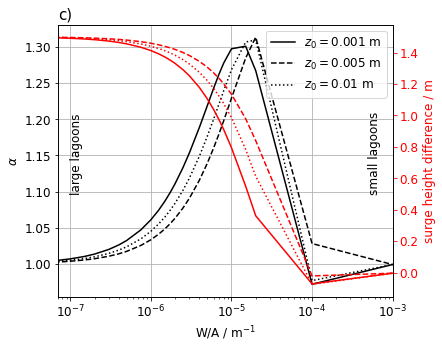

In [6]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots(1,1,figsize=(6,5))

ax.set_title('c)',loc='left',fontsize=15.0)
ax.grid('on')

#take the values for A, W, z0 from the cell before:
A=1e09
W_ar = np.array([50.0,75.0,100.0,150.0,200.0,300.0,400.0,500.0,750.0,1000.0,1250.0,1500.0,1750.0,2000.0,
              2500.0,3000.0,4000.0,5000.0,6000.0,7000.0,8000.0,10000.0,15000.0,20000.0,100000.0,1000000.0])
z_0_ar=np.array([0.001,0.05,0.01])

ax.set_xscale('log')
ax.plot(W_ar/A,Results_z0_dep[0,:],label='$z_0 = 0.001$ m',color='k')
ax.plot(W_ar/A,Results_z0_dep[1,:],label='$z_0 = 0.005$ m',color='k',ls = 'dashed')
ax.plot(W_ar/A,Results_z0_dep[2,:],label='$z_0 = 0.01$ m',color='k',ls = 'dotted')
ax.legend(loc = 'upper right')
ax.set_xlabel('W/A / m$^{-1}$')
ax.set_ylabel('$\\alpha$')
ax.set_xlim(7e-08,1e-03)
ax.annotate('large lagoons', (1e-07,1.1), rotation = 90)
ax.annotate('small lagoons', (5e-04,1.1), rotation = 90)

ax2 = ax.twinx()
ax2.plot(W_ar/A,Reduction_z0_dep[0,:],color='red')
ax2.plot(W_ar/A,Reduction_z0_dep[1,:],label='$z_0 = 0.005$ m',color='red',ls = 'dashed')
ax2.plot(W_ar/A,Reduction_z0_dep[2,:],label='$z_0 = 0.01$ m',color='red',ls = 'dotted')
ax2.set_ylabel('ESL difference / m', color = 'red')
#ax2.set_yticks([0.0,0.25,0.5,0.75,1.0,1.25,1.5])
ax2.tick_params(axis='y', colors='red')
plt.show()

Now let's go back to a fixed lagoon and change the parameters of the prescribed Gaussian surge. This again may take some time to compute.

In [6]:
SLR=np.array([0.0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6]) #m considered SLR in the simulations
A=1e08
H=2.0
W=1000.0
z_0=0.001
dt = 5.0
T_max=2*24*3600
t = np.arange(0.0,T_max+dt,dt)

Amps = np.linspace(1.0,2.0,20)
widths_Gauss = np.linspace(4.0*3600.0,17.5*3600.0,20) 

#store results here
Gauss_slopes_ar = np.zeros((len(Amps),len(widths_Gauss)))

for i in np.arange(len(Amps)):
    for j in np.arange(len(widths_Gauss)):
        eta_0=Gauss(t,Amps[i],widths_Gauss[j])
        slope_Gauss, intercep, _,eta_result,_,_ = model(A,H,W,z_0,dt,T_max,eta_0,SLR=SLR,Regression=True)
        Gauss_slopes_ar[i,j] = slope_Gauss

Plot the results:

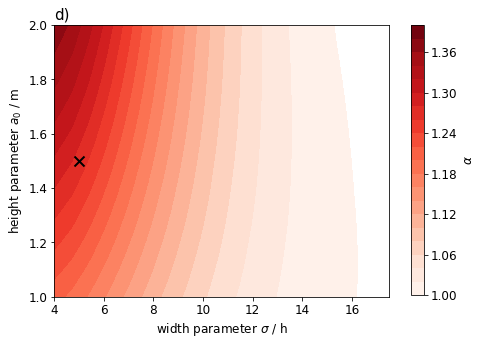

In [7]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots(1,1,figsize=(6,5))

ax.set_title('d)',loc='left',fontsize=15.0)
sca = ax.contourf(widths_Gauss/3600.0,Amps,Gauss_slopes_ar, levels=(np.linspace(1.0,1.4,21)),cmap='Reds')
#mark the surge from a) and c) simulations
ax.scatter(5.0,1.5,c='k',marker='x',s=100.0,lw=2.0)
ax.set_xlabel('width parameter $\sigma$ / h')
ax.set_ylabel('height parameter $a_0$ / m')

axcolorbar=fig.add_axes([0.61, 0.13, 0.4, 0.75])
axcolorbar.axis('off')
plt.colorbar(sca,label='$\\alpha$',ax=axcolorbar)

plt.show()


We have now changed all parameters except the depth of the connecting inlet. Now let's change $H$ as well as $W$. Again this may take some minutes.

In [8]:
SLR=np.array([0.0,0.33,0.66,1.0,1.5])
z_0=0.001
dt = 5.0
T_max=2*24*3600
t = np.arange(0.0,T_max+dt,dt)

eta_0=Gauss(t,1.5,5.0*3600.0)    
    
#depths of the channel
H = np.array([1.0,2.0,2.5,3.0,3.5,4.0,4.5,5.0,7.5,10.0,12.5,15.0,20.0,25.0]) 
#widths of the channel
W = np.array([50.0,75.0,100.0,150.0,200.0,300.0,400.0,500.0,750.0,1000.0,1250.0,1500.0,1750.0,2000.0,
              2500.0,3000.0,4000.0,5000.0,6000.0,7000.0,8000.0,10000.0,15000.0,20000.0,100000.0,1000000.0])
#area of the lagoon (should be kept constant since A/W will be used, i.e. the parameter is controlled by W)
A = np.array([1e09])

###
#output variables

W_ar = []
H_ar = []
A_ar = []
slope_ar = [] #dim = (no_sim,)
damping_ar = []
#### do simulations
sim=1
for h in H:
    for w in W:
        for a in A:                
            #do simulations
            slope, intercep, _,eta_result,_,_ = model(a,h,w,z_0,dt,T_max,eta_0,SLR=SLR,Regression=True)

            #save into the arrays
            slope_ar.append(slope)
            W_ar.append(w)
            H_ar.append(h)
            A_ar.append(a)
            damping_ar.append(np.max(eta_0)-np.max(eta_result[:,0]))

            sim+=1

Plot the results

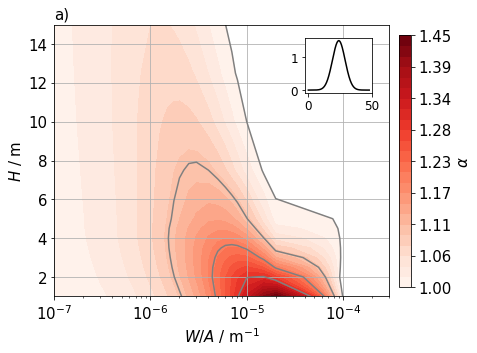

In [18]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots(1,1,figsize=(6,5))

levels_contf = np.linspace(1.0,1.45,25,endpoint=True)
fs=15

ax.set_title('a)',loc='left',fontsize=15.0)
ax.grid('on')
ax.set_xscale('log')

#prepare the contourf plot
pc=ax.contourf(W/A,H,np.reshape(slope_ar,(len(H),len(W))),cmap='Reds',levels=levels_contf)

#contour alpha for 1.0, 1.1, 1.2, 1.3
cs=ax.contour(W/A,H,np.reshape(slope_ar,(len(H),len(W))),levels=np.array([1.0,1.1,1.2,1.3]),colors='grey')

ax.set_xlim(1e-07,3e-04)
ax.set_ylim(H[0],15) 
ax.set_xlabel('$W/A$ / m$^{-1}$',fontsize=fs)
ax.set_ylabel('$H$ / m',fontsize=fs)
ax.tick_params(labelsize=fs)

#colorbar
axcolorbar=fig.add_axes([0.2, 0.15, 0.85, 0.7])
axcolorbar.axis('off')
cbar = plt.colorbar(pc,label='$\\alpha$',ax=axcolorbar,format='%.2f')
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\\alpha$',fontsize=fs)

#inset with prescribed surge
ins = ax.inset_axes([0.75,0.75,0.2,0.2])
ins.plot(t/3600.0 , eta_0,color='k')
ins.set_ylim(0,1.6)
ins.set_xlim(0.0,48.0)
ins.set_yticks([0.0,0.5,1.0,1.5])
ins.set_xticks([0,24,48])
ins.set_ylabel('water level / m')
ins.set_xlabel('time / h')

plt.show()

Now let's put into the same plot the lagoons from the validation, using the parameters from Table 1.

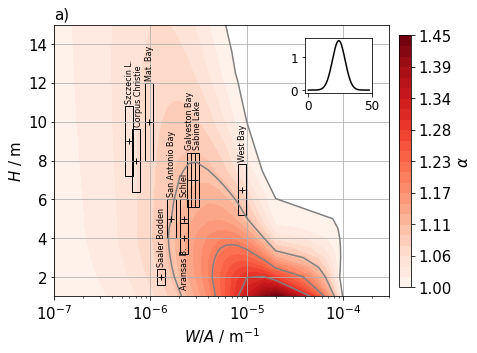

In [23]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots(1,1,figsize=(6,5))

levels_contf = np.linspace(1.0,1.45,25,endpoint=True)
fs=15

ax.set_title('a)',loc='left',fontsize=15.0)
ax.grid('on')
ax.set_xscale('log')

#prepare the contourf plot
pc=ax.contourf(W/A,H,np.reshape(slope_ar,(len(H),len(W))),cmap='Reds',levels=levels_contf)

#contour alpha for 1.0, 1.1, 1.2, 1.3
cs=ax.contour(W/A,H,np.reshape(slope_ar,(len(H),len(W))),levels=np.array([1.0,1.1,1.2,1.3]),colors='grey')

ax.set_xlim(1e-07,3e-04)
ax.set_ylim(H[0],15) 
ax.set_xlabel('$W/A$ / m$^{-1}$',fontsize=fs)
ax.set_ylabel('$H$ / m',fontsize=fs)
ax.tick_params(labelsize=fs)

#colorbar
axcolorbar=fig.add_axes([0.2, 0.15, 0.85, 0.7])
axcolorbar.axis('off')
cbar = plt.colorbar(pc,label='$\\alpha$',ax=axcolorbar,format='%.2f')
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\\alpha$',fontsize=fs)

#inset with prescribed surge
ins = ax.inset_axes([0.75,0.75,0.2,0.2])
ins.plot(t/3600.0 , eta_0,color='k')

###Put in the different lagoons of this study
import matplotlib.patches as patches
#Saaler Bodden
lab = 'Saaler Bodden'
H_SB = 2.0
pm_H_SB = 0.2*H_SB
W_SB = 100.0
A_SB = 78.7e06
rect_SB = patches.Rectangle((W_SB/A_SB/1.1, H_SB-pm_H_SB), -(W_SB/A_SB/1.1-W_SB/A_SB/0.9), 2*pm_H_SB, linewidth=1, edgecolor='k', facecolor='none')
ax.add_patch(rect_SB)
ax.text(W_SB/A_SB/1.1,H_SB+pm_H_SB+0.25,lab,rotation=90,fontsize=8.0)
ax.plot(W_SB/A_SB,H_SB,'k+')

#Schlei
lab = 'Schlei'
H_Sch = 5.0
pm_H_Sch = 0.2*H_Sch
W_Sch = 110.0
A_Sch = 49.6e06
rect_Sch = patches.Rectangle((W_Sch/A_Sch/1.1, H_Sch-pm_H_Sch), -(W_Sch/A_Sch/1.1-W_Sch/A_Sch/0.9), 2*pm_H_Sch, linewidth=1, edgecolor='k', facecolor='none')
ax.add_patch(rect_Sch)
ax.text(W_Sch/A_Sch/1.1,H_Sch+pm_H_Sch+0.25,lab,rotation=90,fontsize=8.0,ma='left')
ax.plot(W_Sch/A_Sch,H_Sch,'k+')

#Szczecin Lagoon
lab = 'Szczecin L.'
H_SL = 9.0
pm_H_SL= 0.2*H_SL
W_SL = 430.0
A_SL = 717.3e06
rect_SL = patches.Rectangle((W_SL/A_SL/1.1, H_SL-pm_H_SL), -(W_SL/A_SL/1.1-W_SL/A_SL/0.9), 2*pm_H_SL, linewidth=1, edgecolor='k', facecolor='none')    
ax.add_patch(rect_SL)
ax.text(W_SL/A_SL/1.1,H_SL+pm_H_SL+0.25,lab,rotation=90,fontsize=8.0)
ax.plot(W_SL/A_SL,H_SL,'k+')

#Corpus Christie,
lab = 'Corpus Christie'
H_Sch = 8.0
pm_H_Sch = 0.2*H_Sch
W_Sch = 500.0
A_Sch = 707.7e06
rect_Sch = patches.Rectangle((W_Sch/A_Sch/1.1, H_Sch-pm_H_Sch), -(W_Sch/A_Sch/1.1-W_Sch/A_Sch/0.9), 2*pm_H_Sch, linewidth=1, edgecolor='k', facecolor='none')
ax.add_patch(rect_Sch)
ax.text(W_Sch/A_Sch/1.05,H_Sch+pm_H_Sch+0.25,lab,rotation=90,fontsize=8.0)
ax.plot(W_Sch/A_Sch,H_Sch,'k+')

#Aransas & Capano
lab = 'Aransas B.'
H_Sch = 4.0
pm_H_Sch = 0.2*H_Sch
W_Sch = 1000.0
A_Sch = 450.1e06
rect_Sch = patches.Rectangle((W_Sch/A_Sch/1.1, H_Sch-pm_H_Sch), -(W_Sch/A_Sch/1.1-W_Sch/A_Sch/0.9), 2*pm_H_Sch, linewidth=1, edgecolor='k', facecolor='none')
ax.add_patch(rect_Sch)
ax.text(W_Sch/A_Sch/1.1,H_Sch-pm_H_Sch-0.25-1.5,lab,rotation=90,fontsize=8.0)
ax.plot(W_Sch/A_Sch,H_Sch,'k+')

#San Antonio Bay
lab = 'San Antonio Bay'
H_Sch = 5.0
pm_H_Sch = 0.2*H_Sch
W_Sch = 1000.0
A_Sch = 607.9e06
rect_Sch = patches.Rectangle((W_Sch/A_Sch/1.1, H_Sch-pm_H_Sch), -(W_Sch/A_Sch/1.1-W_Sch/A_Sch/0.9), 2*pm_H_Sch, linewidth=1, edgecolor='k', facecolor='none')
ax.add_patch(rect_Sch)
ax.text(W_Sch/A_Sch/1.1,H_Sch+pm_H_Sch+0.25,lab,rotation=90,fontsize=8.0)
ax.plot(W_Sch/A_Sch,H_Sch,'k+')

#Matagarda Bay
lab = 'Mat. Bay'
H_Sch = 10.0
pm_H_Sch = 0.2*H_Sch
W_Sch = 900.0
A_Sch = 934.4e06
rect_Sch = patches.Rectangle((W_Sch/A_Sch/1.1, H_Sch-pm_H_Sch), -(W_Sch/A_Sch/1.1-W_Sch/A_Sch/0.9), 2*pm_H_Sch, linewidth=1, edgecolor='k', facecolor='none')
ax.add_patch(rect_Sch)
ax.text(W_Sch/A_Sch/1.1,H_Sch+pm_H_Sch+0.25,lab,rotation=90,fontsize=8.0)
ax.plot(W_Sch/A_Sch,H_Sch,'k+')

#West Bay
lab = 'West Bay'
H_Sch = 6.5
pm_H_Sch = 0.2*H_Sch
W_Sch = 3000.0
A_Sch = 336.5e06
rect_Sch = patches.Rectangle((W_Sch/A_Sch/1.1, H_Sch-pm_H_Sch), -(W_Sch/A_Sch/1.1-W_Sch/A_Sch/0.9), 2*pm_H_Sch, linewidth=1, edgecolor='k', facecolor='none')
ax.add_patch(rect_Sch)
ax.text(W_Sch/A_Sch/1.1,H_Sch+pm_H_Sch+0.25,lab,rotation=90,fontsize=8.0)
ax.plot(W_Sch/A_Sch,H_Sch,'k+')

#Galveston Bay Trinity Bay East Bay
lab = 'Galveston Bay'
H_Sch = 7.0
pm_H_Sch = 0.2*H_Sch
W_Sch = 2800.0
A_Sch = 1067.4e06
rect_Sch = patches.Rectangle((W_Sch/A_Sch/1.1, H_Sch-pm_H_Sch), -(W_Sch/A_Sch/1.1-W_Sch/A_Sch/0.9), 2*pm_H_Sch, linewidth=1, edgecolor='k', facecolor='none')
ax.add_patch(rect_Sch)
ax.text(W_Sch/A_Sch/1.15,H_Sch+pm_H_Sch+0.25,lab,rotation=90,fontsize=8.0)
ax.plot(W_Sch/A_Sch,H_Sch,'k+')

#Sabine Lake
lab = 'Sabine Lake'
H_Sch = 7.0
pm_H_Sch = 0.2*H_Sch
W_Sch = 800.0
A_Sch = 278.5e06
rect_Sch = patches.Rectangle((W_Sch/A_Sch/1.1, H_Sch-pm_H_Sch), -(W_Sch/A_Sch/1.1-W_Sch/A_Sch/0.9), 2*pm_H_Sch, linewidth=1, edgecolor='k', facecolor='none')
ax.add_patch(rect_Sch)
ax.text(W_Sch/A_Sch/1.05,H_Sch+pm_H_Sch+0.25,lab,rotation=90,fontsize=8.0)
ax.plot(W_Sch/A_Sch,H_Sch,'k+')

plt.show()